In [484]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading and understanding the data

In [3]:
# Load data 
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# check the missing values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Remove the columns that is not necessary for model
bike_df.drop(['instant'], axis =1, inplace=True)


In [15]:
bike_df.drop(['casual','registered'], axis=1, inplace=True)

In [17]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Map the values to categorical variables in the data

# Season column
bike_df['season'] = bike_df['season'].astype('str').map({'1':'spring', '2':'summer','3':'fall','4':'winter'})


In [23]:
# weathersit column

bike_df['weathersit'] = bike_df['weathersit'].astype('str').map({'1':'Clear', '2':'Cloudy','3':'Rainy','4':'Thunderstrom'})

In [25]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Data visualization

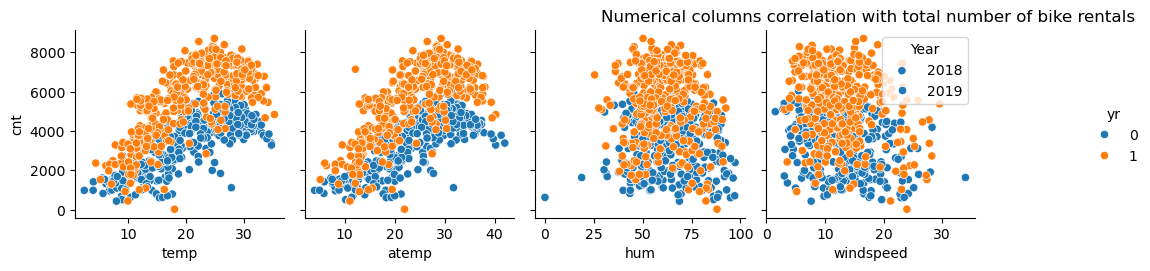

In [69]:
# Visualising Numeric variables
cols_num = ['temp','atemp','hum','windspeed']
sns.pairplot(bike_df, x_vars=cols_num, y_vars='cnt', hue='yr')
plt.title("Numerical columns correlation with total number of bike rentals ")
years = {0:2018, 1:2019}
plt.legend([ years[i] for i in[0,1]],title="Year")
plt.show()

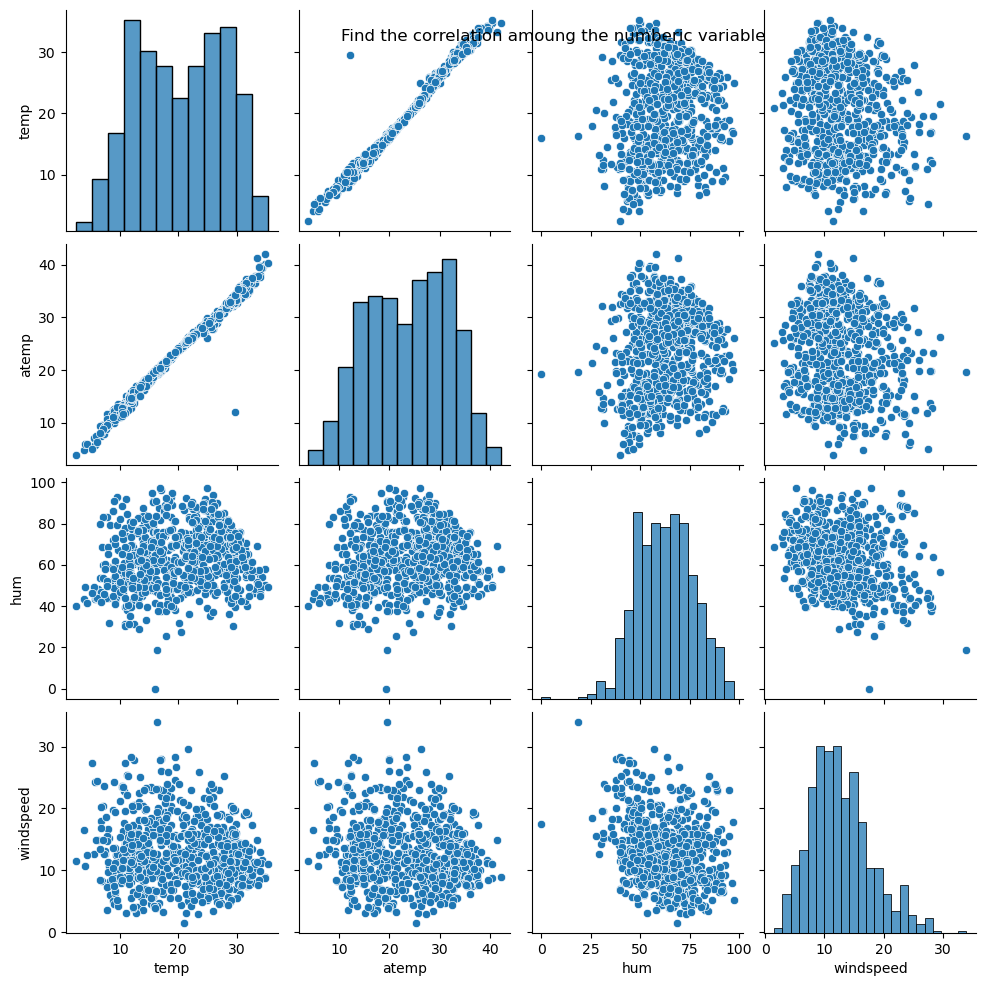

In [63]:
sns.pairplot(bike_df, x_vars=cols_num, y_vars=cols_num)
plt.title("Find the correlation amoung the numberic variable", x=-1, y=4)
plt.show()


In [ ]:
#visualising categorical variables

In [97]:
# Categorical variable correlation
cols_cate = ['season','weathersit','yr','weekday','mnth','workingday']

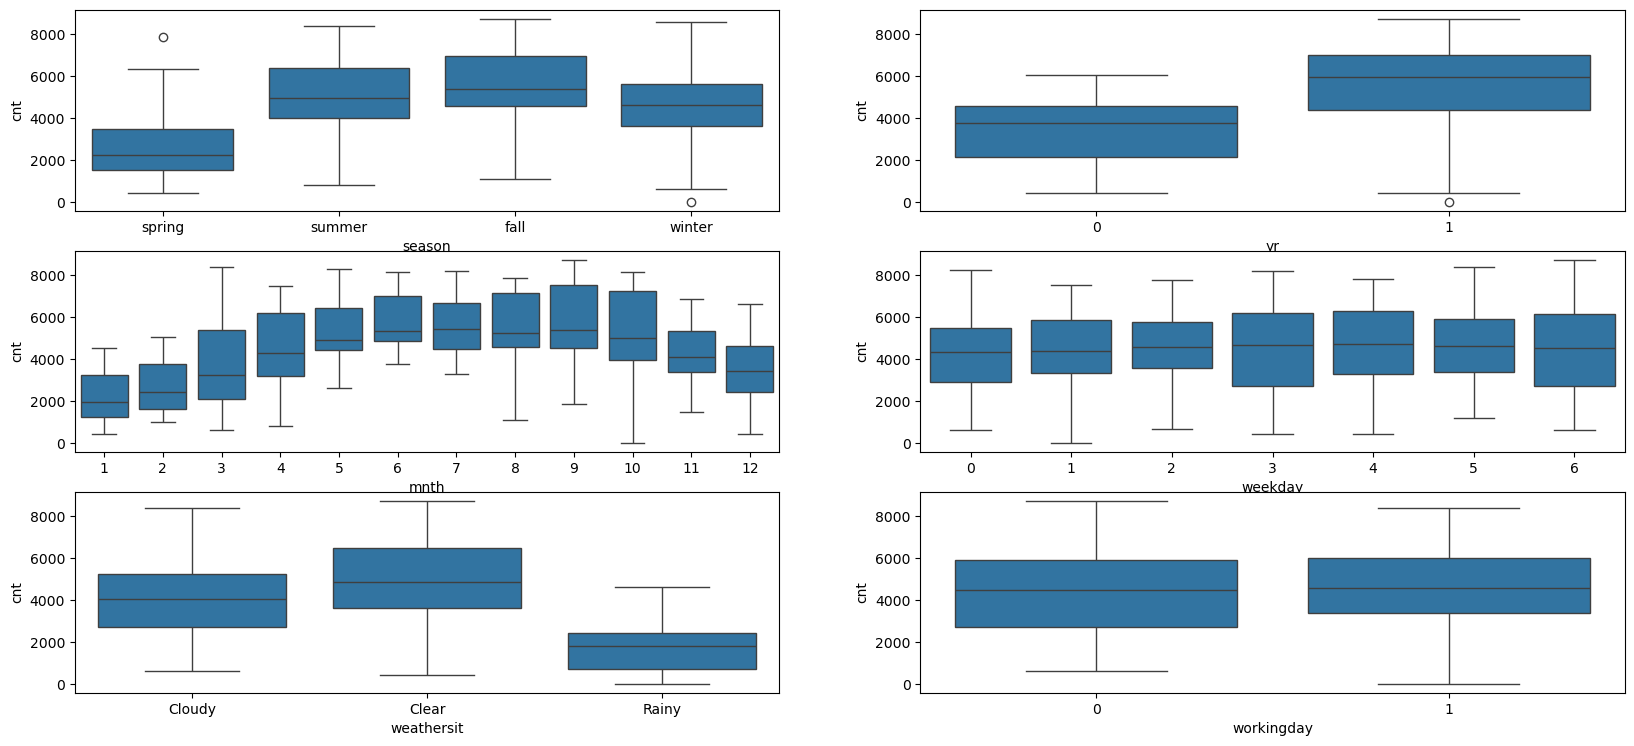

In [99]:
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data= bike_df)
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data= bike_df)
plt.subplot(4,2,4)
sns.boxplot(x='weekday', y='cnt', data= bike_df)
plt.subplot(4,2,5)
sns.boxplot(x='weathersit', y='cnt', data= bike_df)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= bike_df)
plt.show()

In [101]:
# Data Preparation

In [107]:
# Create dummy variables for categorical data
bike_df = pd.get_dummies(bike_df , columns=['season'], drop_first=True, dtype=int)


In [111]:
bike_df = pd.get_dummies(bike_df , columns=['weathersit'], drop_first=True, dtype=int)


In [113]:
bike_df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Rainy
0,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [117]:
bike_df.shape

(730, 16)

In [127]:
# Splitting the data into Traning and Testing sets

In [396]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [398]:
# Rescaling the features - Min-Max scaling
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [400]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [402]:
df_train = df_train.drop('dteday', axis=True)

In [404]:
df_train

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Rainy
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,6,0,1,1,0.824514,0.762183,0.605840,0.355596,0.764151,0,1,0,1,0
578,1,8,0,4,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,0,0,0
53,0,2,0,3,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,0,0,0
350,0,12,0,6,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,1,1,0


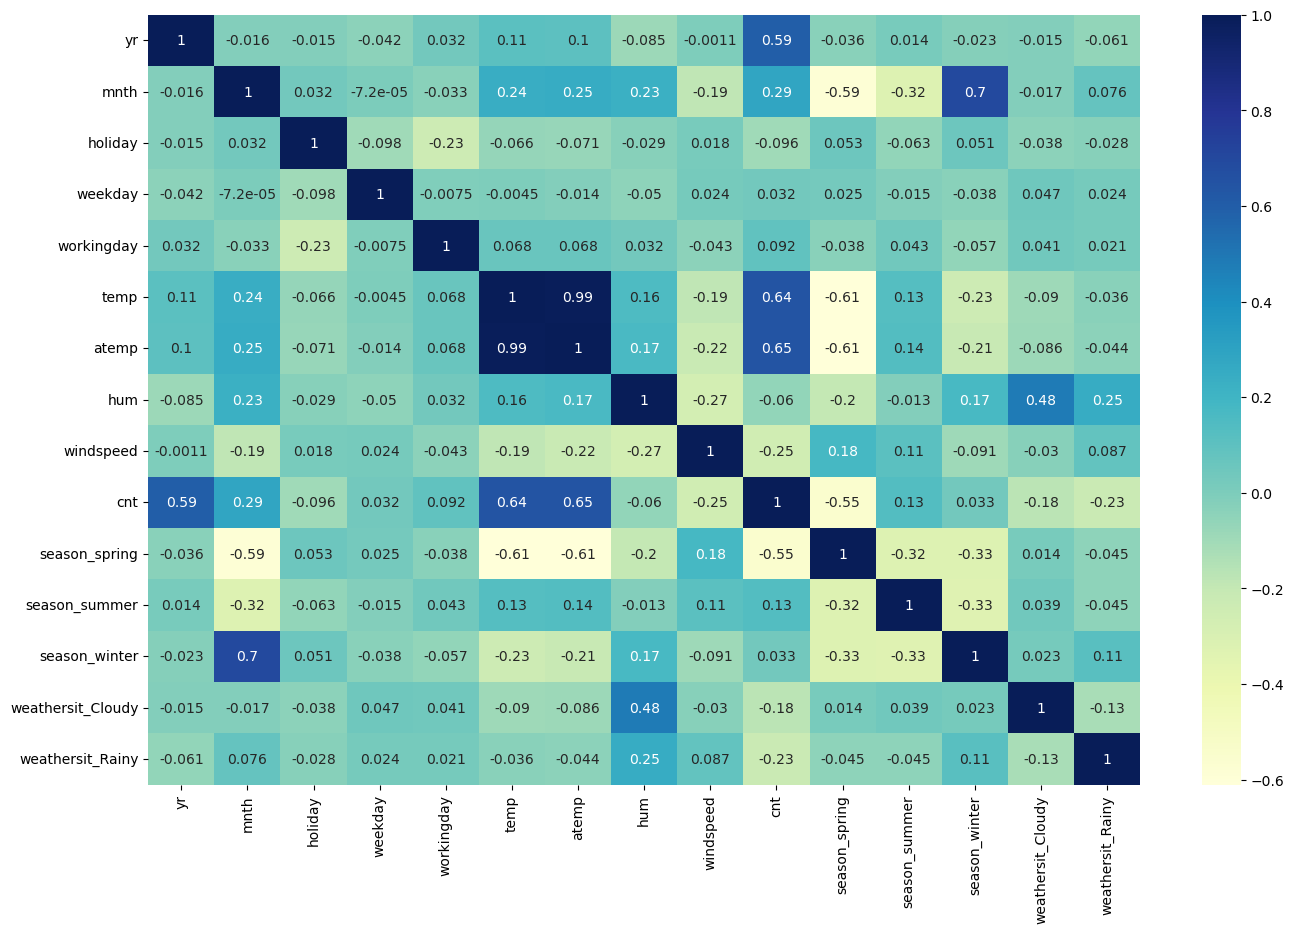

In [406]:
# Correlation coefficients to check which variables are highly correlated
plt.figure(figsize= (16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

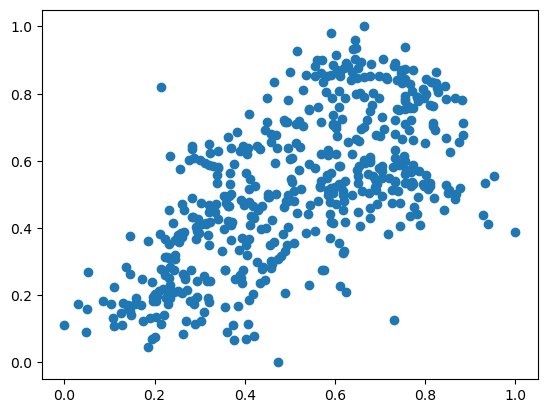

In [408]:
plt.scatter(df_train.atemp , df_train.cnt)
plt.show()

In [410]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train


In [412]:
# building a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a 1st model 
lr = sm.OLS(y_train,X_train_lm).fit()

# summary of LR model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.69e-182
Time:                        17:46:58   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2390      0.039      6.059      0.000       0.161       0.316
yr                    0.2322      0.008     27.708      0.000       0.216       0.249
mnth                  0.0011      0.002      0.488      0.626      -0.003       0.006
holiday              -0.0642      0.027     -2.365      0.018      -0.117      -0.011
weekday               0.0081      0.002      3.899      0.000       0.004       0.012
workingday            0.0188      0.009      2.071      0.039       0.001       0.037
temp                  0.4353      0.139      3.136      0.002       0.163       0.708
atemp                 0.0605      0.142      0.426      0.670      -0.218       0.339
hum                  -0.1260      0.039     -3.233      0.001      -0.203      -0.049
windspeed            -0.1781      0.027     -6.590      0.000      -0.231      -0.125
season_spring        -0.0702      0.023     -3.043      0.002      -0.115      -0.025
season_summer         0.0457      0.016      2.918      0.004       0.015       0.076
season_winter         0.0854      0.019      4.588      0.000       0.049       0.122
weathersit_Cloudy    -0.0582      0.011     -5.339      0.000      -0.080      -0.037
weathersit_Rainy     -0.2478      0.027     -9.082      0.000      -0.301      -0.194
==============================================================================
Omnibus:                       73.742   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.299
Skew:                          -0.732   Prob(JB):                     1.29e-41
Kurtosis:                       5.592   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.54
6,atemp,366.61
7,hum,30.85
1,mnth,15.43
8,windspeed,5.05
11,season_winter,4.73
9,season_spring,4.36
4,workingday,3.20
3,weekday,3.18
10,season_summer,2.66


In [368]:
# High VIF ,High P-value => Remove
# low VIF, Low p-value => keep
# low VIF, high p-value => remove first
# low P-value and hight -vif => remov next

In [418]:
# high p value  atemp
# drop highly correlated variables
X = X_train.drop('atemp', axis=1)



In [420]:
# building a linear model

# Add a constant
X_train_lm = sm.add_constant(X)

# Create a 2nd model 
lr = sm.OLS(y_train,X_train_lm).fit()

# summary of LR model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.31e-183
Time:                        17:48:28   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2388      0.039      6.060      0.000       0.161       0.316
yr                    0.2321      0.008     27.728      0.000       0.216       0.249
mnth                  0.0011      0.002      0.490      0.624      -0.003       0.006
holiday              -0.0647      0.027     -2.388      0.017      -0.118      -0.011
weekday               0.0080      0.002      3.886      0.000       0.004       0.012
workingday            0.0188      0.009      2.070      0.039       0.001       0.037
temp                  0.4927      0.034     14.441      0.000       0.426       0.560
hum                  -0.1253      0.039     -3.221      0.001      -0.202      -0.049
windspeed            -0.1803      0.026     -6.806      0.000      -0.232      -0.128
season_spring        -0.0691      0.023     -3.017      0.003      -0.114      -0.024
season_summer         0.0468      0.015      3.037      0.003       0.017       0.077
season_winter         0.0868      0.018      4.730      0.000       0.051       0.123
weathersit_Cloudy    -0.0583      0.011     -5.355      0.000      -0.080      -0.037
weathersit_Rainy     -0.2486      0.027     -9.137      0.000      -0.302      -0.195
==============================================================================
Omnibus:                       72.450   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.263
Skew:                          -0.719   Prob(JB):                     5.90e-41
Kurtosis:                       5.579   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.79
5,temp,17.16
1,mnth,15.43
7,windspeed,4.83
10,season_winter,4.60
8,season_spring,4.28
4,workingday,3.20
3,weekday,3.17
9,season_summer,2.56
11,weathersit_Cloudy,2.33


In [424]:
# high p value  atemp
# drop highly correlated variables
X = X.drop('mnth', axis=1)



In [426]:
# building a linear model

# Add a constant
X_train_lm = sm.add_constant(X)

# Create a 3rd model 
lr = sm.OLS(y_train,X_train_lm).fit()

# summary of LR model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.00e-184
Time:                        17:48:48   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2459      0.037      6.718      0.000       0.174       0.318
yr                    0.2319      0.008     27.752      0.000       0.216       0.248
holiday              -0.0642      0.027     -2.373      0.018      -0.117      -0.011
weekday               0.0081      0.002      3.924      0.000       0.004       0.012
workingday            0.0187      0.009      2.061      0.040       0.001       0.037
temp                  0.4934      0.034     14.485      0.000       0.426       0.560
hum                  -0.1235      0.039     -3.191      0.002      -0.200      -0.047
windspeed            -0.1800      0.026     -6.802      0.000      -0.232      -0.128
season_spring        -0.0742      0.020     -3.637      0.000      -0.114      -0.034
season_summer         0.0434      0.014      3.165      0.002       0.016       0.070
season_winter         0.0904      0.017      5.406      0.000       0.058       0.123
weathersit_Cloudy    -0.0586      0.011     -5.396      0.000      -0.080      -0.037
weathersit_Rainy     -0.2493      0.027     -9.187      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       72.701   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.556
Skew:                          -0.720   Prob(JB):                     3.09e-41
Kurtosis:                       5.590   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.38
4,temp,15.70
6,windspeed,4.69
7,season_spring,3.90
3,workingday,3.19
2,weekday,3.11
9,season_winter,3.11
10,weathersit_Cloudy,2.28
8,season_summer,2.27
0,yr,2.08


In [432]:
# high p value  atemp
# drop highly correlated variables
X = X.drop('hum', axis=1)



In [434]:
# building a linear model

# Add a constant
X_train_lm = sm.add_constant(X)

# Create a 4th model 
lr = sm.OLS(y_train,X_train_lm).fit()

# summary of LR model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          9.96e-184
Time:                        17:51:23   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1813      0.031      5.892      0.000       0.121       0.242
yr                    0.2350      0.008     28.044      0.000       0.219       0.251
holiday              -0.0642      0.027     -2.353      0.019      -0.118      -0.011
weekday               0.0087      0.002      4.215      0.000       0.005       0.013
workingday            0.0191      0.009      2.085      0.038       0.001       0.037
temp                  0.4673      0.033     14.003      0.000       0.402       0.533
windspeed            -0.1552      0.026     -6.080      0.000      -0.205      -0.105
season_spring        -0.0810      0.020     -3.955      0.000      -0.121      -0.041
season_summer         0.0391      0.014      2.839      0.005       0.012       0.066
season_winter         0.0797      0.017      4.818      0.000       0.047       0.112
weathersit_Cloudy    -0.0789      0.009     -8.867      0.000      -0.096      -0.061
weathersit_Rainy     -0.2838      0.025    -11.293      0.000      -0.333      -0.234
==============================================================================
Omnibus:                       71.228   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.543
Skew:                          -0.714   Prob(JB):                     1.70e-39
Kurtosis:                       5.523   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.15
2,weekday,3.10
6,season_spring,2.28
0,yr,2.07
7,season_summer,1.85
8,season_winter,1.75
9,weathersit_Cloudy,1.54
1,holiday,1.10


In [438]:
# Residual Analysis on the train data

y_train_cnt = lr.predict(X_train_lm)

<Figure size 640x480 with 0 Axes>

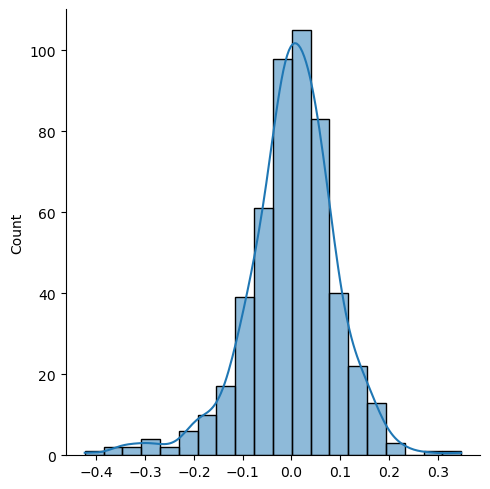

In [466]:
# error terms
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins=20, kde=True)
fig.suptitle('Error terms')
plt.show()

In [456]:
# Making prediction using final model


df_test = df_test.drop('dteday', axis=1)

In [460]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [462]:
# Dividing into X_test and y_test

In [464]:
y_test = df_test.pop('cnt')
X_test = df_test

In [468]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [470]:
# drop  variable hum, atemp, mnth
X_test_sm = X_test_sm.drop(['hum','atemp','mnth'],axis=1)

In [474]:
#make prediction using 4th model
y_test_pred = lr.predict(X_test_sm)

Text(0.5, 0.98, 'y_test vs y_test_pred')

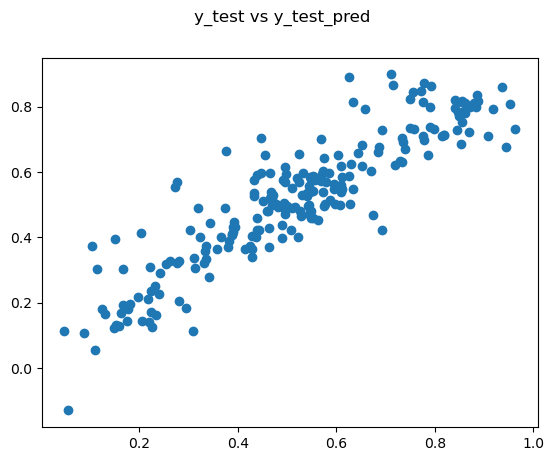

In [476]:
# model evalution

# y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle("y_test vs y_test_pred")

Text(0.5, 0.98, 'y_test vs y_test_pred')

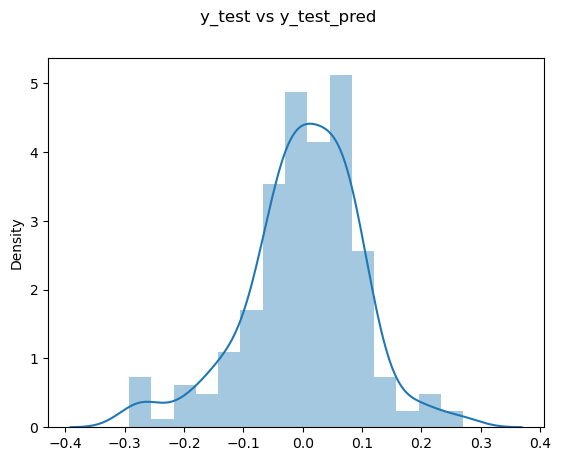

In [482]:
# Error terms 
fig = plt.figure()
sns.distplot(y_test-y_test_pred)
fig.suptitle("y_test vs y_test_pred")

In [486]:
# r2 

r2_score(y_true = y_test, y_pred=y_test_pred)

0.8050115817924299

In [488]:
print("R squared",r2_score(y_true = y_test, y_pred=y_test_pred))
print("Root mean sqr error",mean_squared_error(y_test, y_test_pred))
print("Mean absolute error",mean_absolute_error(y_test, y_test_pred))

R squared 0.8050115817924299
Root mean sqr error 0.00926113250271397
Mean absolute error 0.07276971246183286
